In [1]:
import torch

In [2]:
import requests
import os
import fastf1
from fastf1 import plotting
from fastf1.ergast import Ergast
from datetime import datetime, timedelta
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
import requests
import pandas as pd
import time

def extract_results_to_csv(start_year, end_year):
    all_results = []
    base_url = "http://api.jolpi.ca/ergast/f1/{year}.json"
    results_url_template = "http://api.jolpi.ca/ergast/f1/{year}/{round}/results.json"

    for year in range(start_year, end_year + 1):
        print(f"\n--- Processing Season: {year} ---")
        
        try:
            # Get the schedule for the year
            schedule_url = base_url.format(year=year)
            schedule_response = requests.get(schedule_url)
            schedule_response.raise_for_status()
            schedule = schedule_response.json()['MRData']['RaceTable']['Races']
            print(f"Successfully fetched schedule for {year}.")

            for race in schedule:
                round_num = race['round']
                race_name = race['raceName']
                race_date = race['date']
                circuit_name = race['Circuit']['circuitName']
                
                print(f"  Processing {race_name} (Round {round_num})...")
                
                # Fetch results for each race
                results_url = results_url_template.format(year=year, round=round_num)
                results_response = requests.get(results_url)
                results_response.raise_for_status()

                results_data = results_response.json()
                if results_data['MRData']['RaceTable']['Races']:
                    results = results_data['MRData']['RaceTable']['Races'][0]['Results']
                    
                    for res in results:
                        all_results.append({
                            'season_year': year,
                            'race_round_number': int(round_num),
                            'race_name': race_name,
                            'race_date': race_date,
                            'circuit_name': circuit_name,
                            'driver_name': f"{res['Driver']['givenName']} {res['Driver']['familyName']}",
                            'driver_nationality': res['Driver']['nationality'],
                            'constructor_name': res['Constructor']['name'],
                            'grid_position': int(res['grid']) if int(res['grid']) > 0 else 20,
                            'final_position': int(res['position']),
                            'points': float(res.get('points', 0)),
                            'laps_completed': int(res.get('laps', 0)),
                            'race_time': res.get('Time', {}).get('time', 'N/A'),
                            'fastest_lap': res.get('FastestLap', {}).get('Time', {}).get('time', 'N/A'),
                            'status': res['status']
                        })
                
                print(f"    ✓ Processed {race_name}")
                time.sleep(0.3)  # Small delay to be respectful

        except requests.exceptions.RequestException as e:
            print(f"✗ Error processing year {year}: {e}")
            continue

    if all_results:
        df = pd.DataFrame(all_results)
        df.to_csv('f1_results_2019_2025.csv', index=False)
        print(f"\n✅ Data extraction complete! Saved {len(all_results)} records to 'f1_results_2022_2025.csv'")
        print(f"Columns included: {list(df.columns)}")
    else:
        print("\n❌ No data was extracted. Please check the error messages.")

# Extract data for years after 2021 (2022-2025)
extract_results_to_csv(2019, 2025)



--- Processing Season: 2019 ---
Successfully fetched schedule for 2019.
  Processing Australian Grand Prix (Round 1)...
    ✓ Processed Australian Grand Prix
  Processing Bahrain Grand Prix (Round 2)...
    ✓ Processed Bahrain Grand Prix
  Processing Chinese Grand Prix (Round 3)...
    ✓ Processed Chinese Grand Prix
  Processing Azerbaijan Grand Prix (Round 4)...
    ✓ Processed Azerbaijan Grand Prix
  Processing Spanish Grand Prix (Round 5)...


KeyboardInterrupt: 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
df = pd.read_csv('f1_results_2019_2025.csv')


In [5]:
df.head()

,season_year,race_round_number,race_name,race_date,circuit_name,driver_name,driver_nationality,constructor_name,grid_position,final_position,points,laps_completed,race_time,fastest_lap,status
0,2019,1,Australian Grand Prix,17-03-2019,Albert Park Grand Prix Circuit,Valtteri Bottas,Finnish,Mercedes,2,1,26.0,58,25:27.3,01:25.6,Finished
1,2019,1,Australian Grand Prix,17-03-2019,Albert Park Grand Prix Circuit,Lewis Hamilton,British,Mercedes,1,2,18.0,58,20.886,01:26.1,Finished
2,2019,1,Australian Grand Prix,17-03-2019,Albert Park Grand Prix Circuit,Max Verstappen,Dutch,Red Bull,4,3,15.0,58,22.52,01:26.3,Finished
3,2019,1,Australian Grand Prix,17-03-2019,Albert Park Grand Prix Circuit,Sebastian Vettel,German,Ferrari,3,4,12.0,58,57.109,01:28.0,Finished
4,2019,1,Australian Grand Prix,17-03-2019,Albert Park Grand Prix Circuit,Charles Leclerc,Monegasque,Ferrari,5,5,10.0,58,58.203,01:26.9,Finished


In [6]:
df.describe()

,season_year,race_round_number,grid_position,final_position,points,laps_completed
count,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000
mean,2021.905289,10.867763,10.522159,10.493209,5.075947,54.732309
std,1.896679,6.272990,5.790223,5.763773,7.225506,17.255701
min,2019.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2020.000000,6.000000,5.250000,5.250000,0.000000,51.000000
50%,2022.000000,11.000000,11.000000,10.000000,0.750000,57.000000
75%,2024.000000,16.000000,16.000000,15.000000,9.000000,66.000000
max,2025.000000,24.000000,20.000000,20.000000,26.000000,87.000000


In [7]:
df.isnull().sum()

season_year             0
race_round_number       0
race_name               0
race_date               0
circuit_name            0
driver_name             0
driver_nationality      0
constructor_name        0
grid_position           0
final_position          0
points                  0
laps_completed          0
race_time             891
fastest_lap           112
status                  0
dtype: int64

In [8]:
df.columns

Index(['season_year', 'race_round_number', 'race_name', 'race_date',
       'circuit_name', 'driver_name', 'driver_nationality', 'constructor_name',
       'grid_position', 'final_position', 'points', 'laps_completed',
       'race_time', 'fastest_lap', 'status'],
      dtype='object')

In [9]:
df.shape

(2798, 15)

In [10]:
df['season_year'].nunique()

7

In [11]:

print("The number of unique drivers is:", df['driver_name'].nunique())
print("The number of unique constructors is:", df['constructor_name'].nunique())
print("The number of unique circuits is:", df['circuit_name'].nunique())


The number of unique drivers is: 39
The number of unique constructors is: 15
The number of unique circuits is: 31


In [12]:
print("Races per season:")
df.groupby('season_year')['race_round_number'].nunique()

Races per season:


season_year
2019    21
2020    17
2021    22
2022    22
2023    22
2024    24
2025    12
Name: race_round_number, dtype: int64

## Winner Analysis

In [13]:
# Most successful drivers (race wins)
race_winners = df[df['final_position'] == 1]['driver_name'].value_counts()
race_winners

driver_name
Max Verstappen      60
Lewis Hamilton      32
Charles Leclerc      8
Lando Norris         8
Valtteri Bottas      7
Oscar Piastri        7
Sergio Pérez         6
Carlos Sainz         4
George Russell       4
Sebastian Vettel     1
Daniel Ricciardo     1
Pierre Gasly         1
Esteban Ocon         1
Name: count, dtype: int64

In [14]:
constructor_wins = df[df['final_position'] == 1]['constructor_name'].value_counts()
print(f"\nTop Constructor Wins:")
print(constructor_wins.head(8))


Top Constructor Wins:
constructor_name
Red Bull          65
Mercedes          43
McLaren           16
Ferrari           13
AlphaTauri         1
Racing Point       1
Alpine F1 Team     1
Name: count, dtype: int64


## Most Successful Qualifying

In [15]:
print("Wins from each grid position:")
df[df['final_position'] == 1]['grid_position'].value_counts().sort_index()

Wins from each grid position:


grid_position
1     72
2     32
3     16
4      6
5      2
6      4
7      1
8      1
9      1
10     3
14     1
17     1
Name: count, dtype: int64

In [16]:
print("Pole Position Results:")
df[df['grid_position'] == 1]['final_position'].value_counts().sort_index()

Pole Position Results:


final_position
1     72
2     24
3     16
4      8
5      2
6      1
7      2
8      1
9      2
15     1
18     1
19     5
20     5
Name: count, dtype: int64

In [17]:
print(f"\nAverage finish position by starting grid:")
df.groupby('grid_position')['final_position'].mean()


Average finish position by starting grid:


grid_position
1      3.457143
2      4.100000
3      5.285714
4      5.814286
5      7.535714
6      7.735714
7      8.640288
8      9.892086
9     10.014286
10    11.417266
11    11.280576
12    11.757143
13    12.731884
14    13.553957
15    13.446043
16    14.187050
17    14.392857
18    15.116788
19    14.760870
20    14.644737
Name: final_position, dtype: float64

In [18]:
df['status'].value_counts()

status
Finished            1650
+1 Lap               427
Lapped               252
Retired              121
+2 Laps               68
Collision             58
Accident              28
Collision damage      24
Engine                18
Power Unit            15
Brakes                13
Gearbox               12
Disqualified          11
+3 Laps               10
Suspension             8
Did not start          8
Hydraulics             6
Withdrew               5
Power loss             5
Water pressure         4
Spun off               4
Fuel pressure          3
Oil leak               3
Wheel                  3
Puncture               3
Electronics            3
Overheating            3
Undertray              3
Exhaust                2
Damage                 2
Transmission           2
Mechanical             2
Turbo                  2
Illness                2
Water leak             2
Out of fuel            1
Wheel nut              1
Debris                 1
Radiator               1
+5 Laps           

## Fastest Lap of Each  CIRCUIT

In [19]:
def get_fastest_laps_by_circuit(csv_file):
    """
    Extract the fastest lap time for each circuit from F1 race data
    """
    # Load data
    df1 = pd.read_csv(csv_file)
    
    # Convert lap times to seconds for proper comparison
    def parse_laptime(time_str):
        if pd.isna(time_str) or time_str == 'N/A':
            return np.nan
        try:
            if ':' in str(time_str):
                min_sec = str(time_str).split(':')
                return int(min_sec[0]) * 60 + float(min_sec[1])
            return float(time_str)
        except:
            return np.nan
    
    df1['lap_seconds'] = df1['fastest_lap'].apply(parse_laptime)
    df_valid = df1.dropna(subset=['lap_seconds'])
    
    # Get fastest lap per circuit
    fastest_by_circuit = df_valid.loc[df_valid.groupby('circuit_name')['lap_seconds'].idxmin()]
    
    # Create results
    results = fastest_by_circuit.sort_values('circuit_name')[
        ['circuit_name', 'fastest_lap', 'driver_name', 'constructor_name', 'season_year', 'race_name']
    ].copy()
    
    return results

# Execute the function
fastest_laps = get_fastest_laps_by_circuit('f1_results_2019_2025.csv')

# Display results
print("🏎️  FASTEST LAP RECORDS BY CIRCUIT (2019-2025)")
print("=" * 70)

for _, record in fastest_laps.iterrows():
    print(f"🏁 {record['circuit_name']}")
    print(f"   ⏱️  {record['fastest_lap']}")
    print(f"   🏆 {record['driver_name']} ({record['constructor_name']})")
    print(f"   📅 {record['season_year']} {record['race_name']}")
    print()


🏎️  FASTEST LAP RECORDS BY CIRCUIT (2019-2025)
🏁 Albert Park Grand Prix Circuit
   ⏱️  01:19.8
   🏆 Charles Leclerc (Ferrari)
   📅 2024 Australian Grand Prix

🏁 Autodromo Enzo e Dino Ferrari
   ⏱️  01:15.5
   🏆 Lewis Hamilton (Mercedes)
   📅 2020 Emilia Romagna Grand Prix

🏁 Autodromo Internazionale del Mugello
   ⏱️  01:18.8
   🏆 Lewis Hamilton (Mercedes)
   📅 2020 Tuscan Grand Prix

🏁 Autodromo Nazionale di Monza
   ⏱️  01:21.4
   🏆 Lando Norris (McLaren)
   📅 2024 Italian Grand Prix

🏁 Autódromo Hermanos Rodríguez
   ⏱️  01:17.8
   🏆 Valtteri Bottas (Mercedes)
   📅 2021 Mexico City Grand Prix

🏁 Autódromo Internacional do Algarve
   ⏱️  01:18.7
   🏆 Lewis Hamilton (Mercedes)
   📅 2020 Portuguese Grand Prix

🏁 Autódromo José Carlos Pace
   ⏱️  01:10.7
   🏆 Valtteri Bottas (Mercedes)
   📅 2019 Brazilian Grand Prix

🏁 Bahrain International Circuit
   ⏱️  55.404
   🏆 George Russell (Mercedes)
   📅 2020 Sakhir Grand Prix

🏁 Baku City Circuit
   ⏱️  01:43.0
   🏆 Charles Leclerc (Ferrari)


In [20]:
df.head()

,season_year,race_round_number,race_name,race_date,circuit_name,driver_name,driver_nationality,constructor_name,grid_position,final_position,points,laps_completed,race_time,fastest_lap,status
0,2019,1,Australian Grand Prix,17-03-2019,Albert Park Grand Prix Circuit,Valtteri Bottas,Finnish,Mercedes,2,1,26.0,58,25:27.3,01:25.6,Finished
1,2019,1,Australian Grand Prix,17-03-2019,Albert Park Grand Prix Circuit,Lewis Hamilton,British,Mercedes,1,2,18.0,58,20.886,01:26.1,Finished
2,2019,1,Australian Grand Prix,17-03-2019,Albert Park Grand Prix Circuit,Max Verstappen,Dutch,Red Bull,4,3,15.0,58,22.52,01:26.3,Finished
3,2019,1,Australian Grand Prix,17-03-2019,Albert Park Grand Prix Circuit,Sebastian Vettel,German,Ferrari,3,4,12.0,58,57.109,01:28.0,Finished
4,2019,1,Australian Grand Prix,17-03-2019,Albert Park Grand Prix Circuit,Charles Leclerc,Monegasque,Ferrari,5,5,10.0,58,58.203,01:26.9,Finished


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season_year         2798 non-null   int64  
 1   race_round_number   2798 non-null   int64  
 2   race_name           2798 non-null   object 
 3   race_date           2798 non-null   object 
 4   circuit_name        2798 non-null   object 
 5   driver_name         2798 non-null   object 
 6   driver_nationality  2798 non-null   object 
 7   constructor_name    2798 non-null   object 
 8   grid_position       2798 non-null   int64  
 9   final_position      2798 non-null   int64  
 10  points              2798 non-null   float64
 11  laps_completed      2798 non-null   int64  
 12  race_time           1907 non-null   object 
 13  fastest_lap         2686 non-null   object 
 14  status              2798 non-null   object 
dtypes: float64(1), int64(5), object(9)
memory usage: 328.0+

## Visualisation

In [22]:
race_winners

driver_name
Max Verstappen      60
Lewis Hamilton      32
Charles Leclerc      8
Lando Norris         8
Valtteri Bottas      7
Oscar Piastri        7
Sergio Pérez         6
Carlos Sainz         4
George Russell       4
Sebastian Vettel     1
Daniel Ricciardo     1
Pierre Gasly         1
Esteban Ocon         1
Name: count, dtype: int64

In [23]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

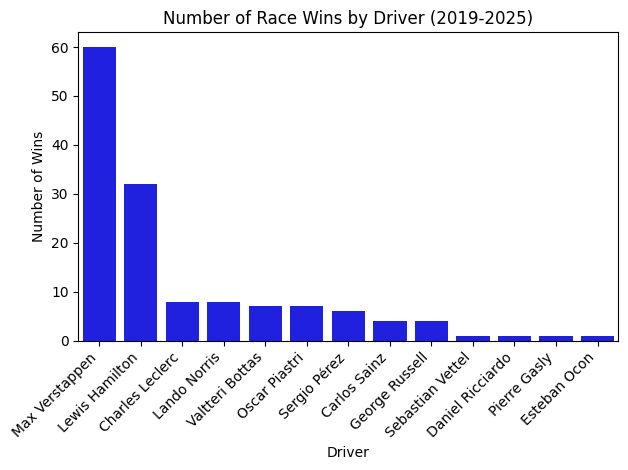

In [26]:
sns.barplot(x=race_winners.index, y=race_winners.values, color='b')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Race Wins by Driver (2019-2025)')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.tight_layout()

In [27]:
constructor_wins

constructor_name
Red Bull          65
Mercedes          43
McLaren           16
Ferrari           13
AlphaTauri         1
Racing Point       1
Alpine F1 Team     1
Name: count, dtype: int64

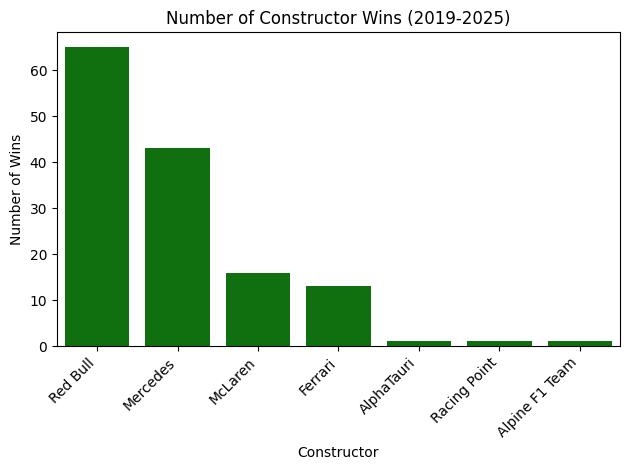

In [28]:
sns.barplot(x=constructor_wins.index, y=constructor_wins.values, color='g')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Constructor Wins (2019-2025)')
plt.xlabel('Constructor')
plt.ylabel('Number of Wins')
plt.tight_layout()

In [29]:
podium_finishers = df[df['final_position'] <= 3]['driver_name'].value_counts()
podium_finishers

driver_name
Max Verstappen           95
Lewis Hamilton           68
Charles Leclerc          47
Valtteri Bottas          37
Lando Norris             36
Sergio Pérez             31
Carlos Sainz             27
George Russell           20
Oscar Piastri            20
Sebastian Vettel         11
Fernando Alonso           9
Pierre Gasly              5
Esteban Ocon              4
Daniel Ricciardo          3
Lance Stroll              2
Alexander Albon           2
Daniil Kvyat              1
Andrea Kimi Antonelli     1
Nico Hülkenberg           1
Name: count, dtype: int64

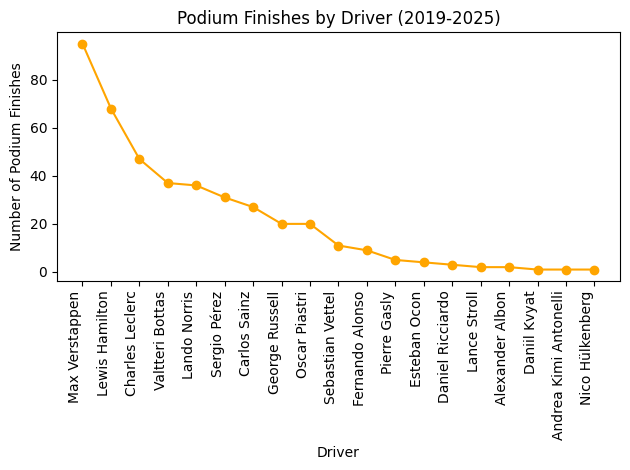

In [34]:
plt.plot(podium_finishers.index, podium_finishers.values, marker='o', linestyle='-', color='orange')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Driver')
plt.ylabel('Number of Podium Finishes')
plt.title('Podium Finishes by Driver (2019-2025)')
plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

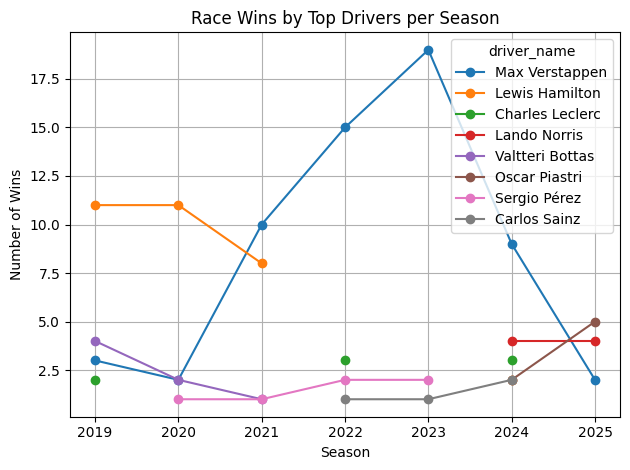

In [37]:
plt.figure(figsize=(12, 6))
top_drivers = race_winners.nlargest(8).index
season_wins = df[df['final_position'] == 1].groupby(['season_year', 'driver_name']).size().unstack()
season_wins[top_drivers].plot(marker='o')
plt.title('Race Wins by Top Drivers per Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.grid(True)
plt.tight_layout()
plt.show()

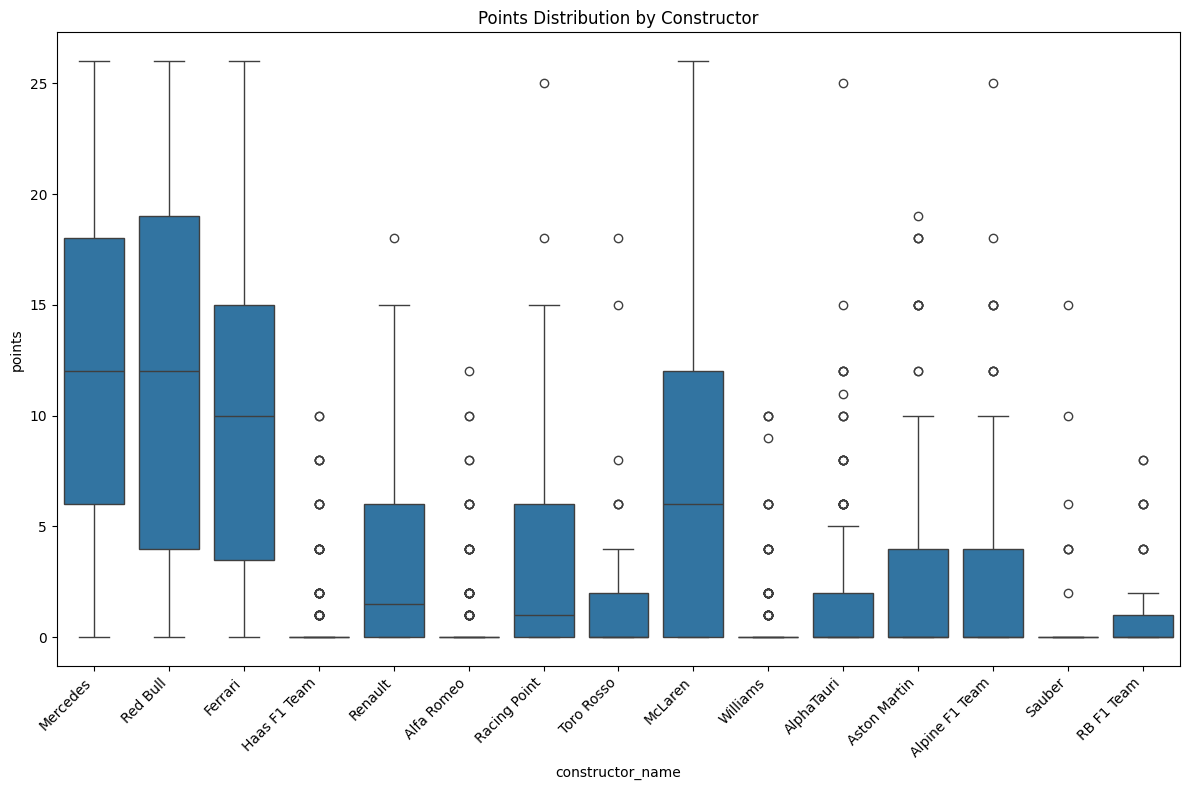

In [57]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='constructor_name', y='points', data=df)
plt.title('Points Distribution by Constructor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [47]:
winners_df = df[df['final_position'] == 1]
wins_per_circuit_driver = winners_df.groupby(['circuit_name', 'driver_name']).size().reset_index(name='win_count')




In [50]:

most_wins_by_driver_on_circuit = wins_per_circuit_driver.sort_values('win_count', ascending=False)\
    .groupby('circuit_name').first().reset_index()

# Show top 10 for preview
most_wins_by_driver_on_circuit.head()

,circuit_name,driver_name,win_count
0,Albert Park Grand Prix Circuit,Charles Leclerc,1
1,Autodromo Enzo e Dino Ferrari,Max Verstappen,4
2,Autodromo Internazionale del Mugello,Lewis Hamilton,1
3,Autodromo Nazionale di Monza,Charles Leclerc,2
4,Autódromo Hermanos Rodríguez,Max Verstappen,3


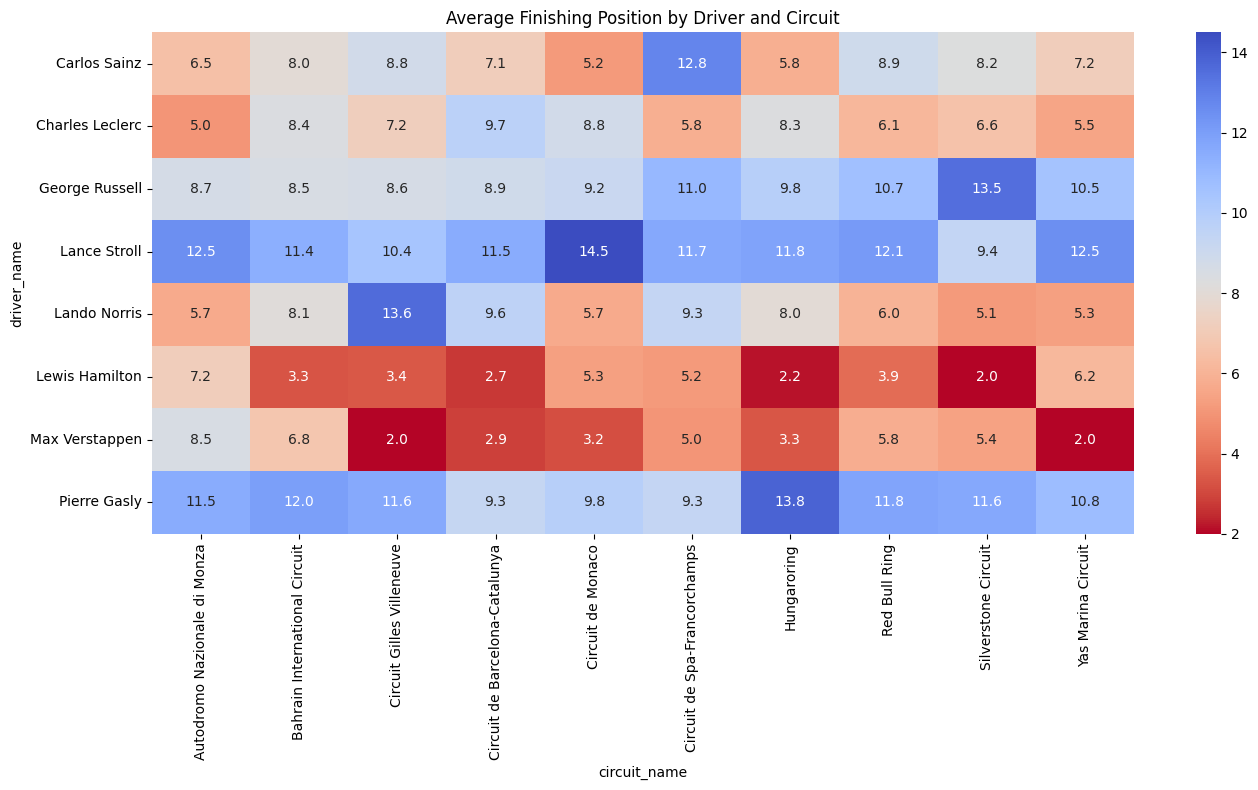

In [52]:
top_circuits = df['circuit_name'].value_counts().nlargest(10).index
top_drivers = df['driver_name'].value_counts().nlargest(8).index

circuit_perf = pd.pivot_table(
    df[df['circuit_name'].isin(top_circuits) & df['driver_name'].isin(top_drivers)],
    values='final_position',
    index='driver_name',
    columns='circuit_name',
    aggfunc='mean'
)

plt.figure(figsize=(14, 8))
sns.heatmap(circuit_perf, annot=True, cmap='coolwarm_r', fmt='.1f')
plt.title('Average Finishing Position by Driver and Circuit')
plt.tight_layout()
plt.show()

In [61]:
dnf_status = df[df['status'] !='Finished']['status'].value_counts().nlargest(10)
dnf_status

status
+1 Lap              427
Lapped              252
Retired             121
+2 Laps              68
Collision            58
Accident             28
Collision damage     24
Engine               18
Power Unit           15
Brakes               13
Name: count, dtype: int64